<a href="https://colab.research.google.com/github/MKolaksazov/Machine-Learning/blob/master/Stock%20Prediction/Stock_Price_Prediction_from_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##A simple program for stock prediction of the 'close' prises of APPLE,
##based on the data from Yahoo finance

Before importing the necessary libraries, we have to install the missing ones

In [1]:
! pip install --upgrade pandas-datareader

In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

Importing the data from the site of Yahoo, with the stock name 'AAPL' 

In [3]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591941
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659608
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800156
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933966
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913451
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.701714
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.871689
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.780678


In [4]:
df.shape

(2003, 6)

Plot a graph of the actual values from the site ('closing' prises)

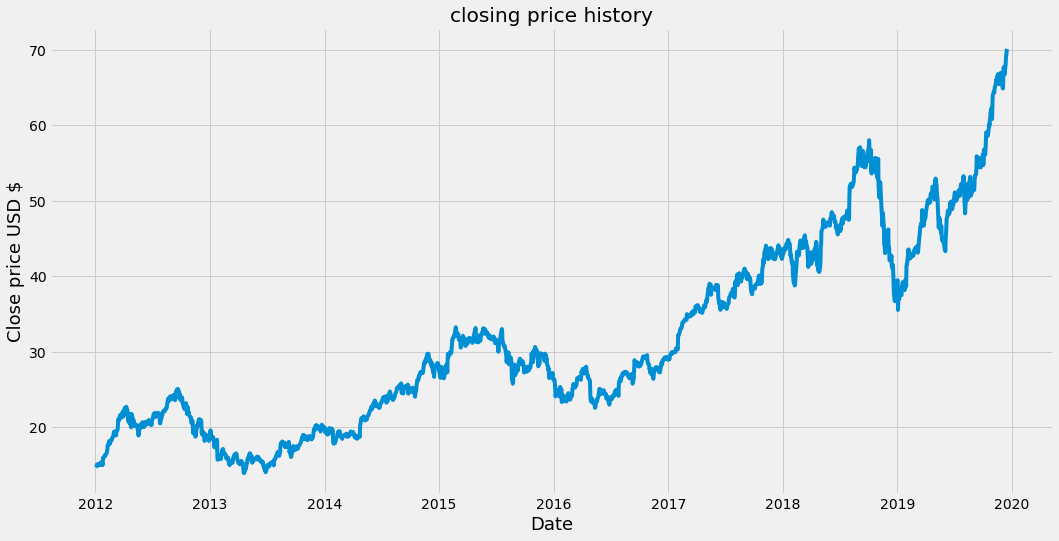

In [5]:
plt.figure(figsize=(16,8))
plt.title('closing price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD $', fontsize=18)
plt.show()

Taking the 'clisong' prises from the data (the first 80% will be used for </br>training the model and the last 20% we will use to test the model)

In [6]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1603

Scaling data between 0 and 1 (a transformation of the data, so that the new </br>values are represented in a comparable scale in the range from 0 to 1)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

Extracting the first 80% of the data from the scaled dataframe and initializing </br> this as the training set.

After that the data was split between the training set and the labels of the set </br>(the target variables or the 'y' set)

The training set contains arrays with the information from the last 60 days,
</br> and the 'y' or target variables contain the corresponding data, that </br>should be predicted by these variables from the last 60 days

In [8]:
train_data = scaled_data[0:training_data_len, : ]

x_train = []

y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60 : i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



Converting to numpy arrays

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

Reshaping the array to fit the prediction model

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

The model uses recurent neural network, called LSTM (or long short term memory)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 51s 30ms/step - loss: 8.5856e-04


Creating the test data. It will contain the data from 1543 to 2003rd variable, </br> or th last 20%. Again, it will be split into two parts, </br> the actual input data or 'x_test' and the output, or the target data. 

In [15]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])

Again we will need to convert the data to np.array and reshape it, in order </br> to fit in the ML model. 

In [16]:
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Predict the closing prices, by using the test dataset. The output prediction </br> data should be 'scale inverted' in order to transform it from scalar </br> to normal, corresponding to the input data. This is performed using the </br> 'inverse_transform' function.

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Check the error of the predicted values (the root mean square error), or </br> the deviation from the real values

In [19]:
rmse = np.sqrt( np.mean(predictions - y_test) ** 2 )
rmse

1.2692194175720215

Finally, the output, or the predicted values should be plotted in a </br> graphical form. In this example, we compare the real vs. the predicted data </br> to see if our ML model is correct (and how close to the truth it is).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


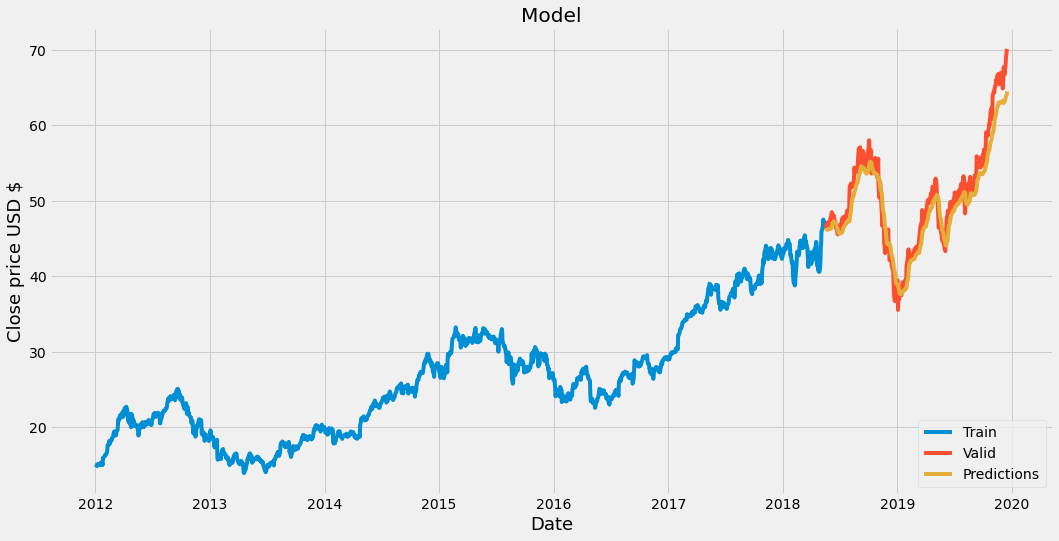

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()